In [2]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 419 kB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=986e3c1302e13b6a614e27b81ae101d3b63671137dfa77316f70e933c9cbfb5e
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [3]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('../input/greenhouse/green.xlsx')
df.head()

,state,production_based_emissions,production_based_emissions_excluding_land_use,consumption_based_emissions,production_based_emissions_including_land_use
0,China,11576.0,12700.0,8801.0,NaN
1,United States,5833.0,6570.0,5716.0,5903.0
2,European Union,3162.0,NaN,4166.0,3951.0
3,India,3235.0,2870.0,2217.0,NaN
4,Russia,2391.0,2670.0,1381.0,1630.0


In [5]:
df.corr()

,production_based_emissions,production_based_emissions_excluding_land_use,consumption_based_emissions,production_based_emissions_including_land_use
production_based_emissions,1.000000,0.997766,0.962734,0.985907
production_based_emissions_excluding_land_use,0.997766,1.000000,0.987854,0.985867
consumption_based_emissions,0.962734,0.987854,1.000000,0.996278
production_based_emissions_including_land_use,0.985907,0.985867,0.996278,1.000000


In [6]:
df = df.loc[(df.state!='European Union')&(df.production_based_emissions.notnull()),['state','production_based_emissions']]
df.head()

,state,production_based_emissions
0,China,11576.0
1,United States,5833.0
3,India,3235.0
4,Russia,2391.0
5,Japan,1264.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 79
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       53 non-null     object 
 1   production_based_emissions  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [8]:
states=list(df.state.unique())

diz={}
geolocator = Nominatim(user_agent="Your_Name")
for i in states:
    location = geolocator.geocode(i)
    diz[i] = (location.latitude, location.longitude)

In [9]:
diz

{'China': (35.000074, 104.999927),
 'United States': (39.7837304, -100.4458825),
 'India': (22.3511148, 78.6677428),
 'Russia': (64.6863136, 97.7453061),
 'Japan': (36.5748441, 139.2394179),
 'Brazil': (-10.3333333, -53.2),
 'Germany': (51.0834196, 10.4234469),
 'Indonesia': (-2.4833826, 117.8902853),
 'Canada': (61.0666922, -107.991707),
 'Mexico': (22.5000485, -100.0000375),
 'Iran': (32.6475314, 54.5643516),
 'South Korea': (36.638392, 127.6961188),
 'Australia': (-24.7761086, 134.755),
 'Saudi Arabia': (25.6242618, 42.3528328),
 'United Kingdom': (54.7023545, -3.2765753),
 'South Africa': (-28.8166236, 24.991639),
 'France': (46.603354, 1.8883335),
 'Italy': (42.6384261, 12.674297),
 'Turkey': (38.9597594, 34.9249653),
 'Ukraine': (49.4871968, 31.2718321),
 'Thailand': (14.8971921, 100.83273),
 'Poland': (52.215933, 19.134422),
 'Argentina': (-34.9964963, -64.9672817),
 'Pakistan': (30.3308401, 71.247499),
 'Kazakhstan': (47.2286086, 65.2093197),
 'Spain': (39.3260685, -4.8379791),

In [10]:
df['latitude'] = df['state'].apply(lambda x: diz[x][0])
df['longitude'] = df['state'].apply(lambda x: diz[x][1])
df.head()

,state,production_based_emissions,latitude,longitude
0,China,11576.0,35.000074,104.999927
1,United States,5833.0,39.783730,-100.445882
3,India,3235.0,22.351115,78.667743
4,Russia,2391.0,64.686314,97.745306
5,Japan,1264.0,36.574844,139.239418


In [11]:
df.corr()

,production_based_emissions,latitude,longitude
production_based_emissions,1.000000,0.014911,0.098339
latitude,0.014911,1.000000,-0.076777
longitude,0.098339,-0.076777,1.000000


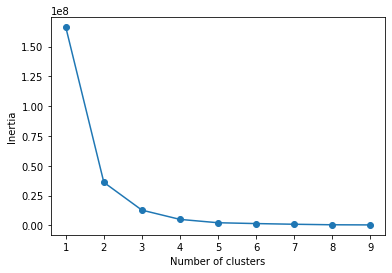

In [12]:
X = df.drop(['state'],axis=1).values
criterion_functions = []

for i in range(1, 10):
    km = KMeans(
        n_clusters=i, random_state=42
    )
    km.fit(X)
    criterion_functions.append(km.inertia_)

# plot
plt.plot(range(1, 10), criterion_functions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_
df['label']=labels
diz_cluster = {0:'cluster1',1:'cluster2',2:'cluster3',3:'cluster4'}
df['label_str'] = df['label'].apply(lambda x: diz_cluster[x])

In [14]:
labels

array([2, 3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
df.head()

,state,production_based_emissions,latitude,longitude,label,label_str
0,China,11576.0,35.000074,104.999927,2,cluster3
1,United States,5833.0,39.783730,-100.445882,3,cluster4
3,India,3235.0,22.351115,78.667743,0,cluster1
4,Russia,2391.0,64.686314,97.745306,0,cluster1
5,Japan,1264.0,36.574844,139.239418,1,cluster2


In [ ]:
df[df.label==0]

In [ ]:
df[df.label==1]

In [ ]:
df[df.label==2]

In [ ]:
df[df.label==3]

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [16]:
df.columns

Index(['state', 'production_based_emissions', 'latitude', 'longitude', 'label',
       'label_str'],
      dtype='object')

In [17]:
fig = px.histogram(df, x='label',  histfunc='count', height=700,color='state'
                    ,title='Count of countries for each cluster')
fig.show()

In [18]:
fig = px.scatter_3d(df, x="latitude", y="longitude", z="production_based_emissions", 
                    color="label_str")
fig.show()

In [19]:
fig = px.scatter_3d(df, x="latitude", y="longitude", z="production_based_emissions", 
                    color="label_str",symbol='state', opacity=0.8)
fig.show()

In [20]:
df.columns

Index(['state', 'production_based_emissions', 'latitude', 'longitude', 'label',
       'label_str'],
      dtype='object')

In [23]:
fig = px.scatter_geo(df,  color="label_str", 
                     hover_name="state", size="production_based_emissions",
                     projection="natural earth",lat="latitude",lon="longitude")
fig.show()